In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

from mle_toolbox import load_result_logs

# PDE Integration Example
### Load in meta-log and hyper-log files

- The meta-log stores all detailed training logs (e.g. training curves, etc.)
- The hyper-log stores all aggregated training results

In [2]:
# Load log and get overview of different logged runs
meta_log, hyper_log = load_result_logs("../examples/experiments/pde/")
list(meta_log.b_1_eval_3.time.keys())

['step_counter', 'time_elapsed']

In [3]:
# And here are the different items stored in the log
print("Outer level:", list(meta_log.b_1_eval_0.keys()))
print("Meta level:", list(meta_log.b_1_eval_0.meta.keys()))
print("Time level:", list(meta_log.b_1_eval_0.time.keys()))
print("Stats level:", list(meta_log.b_1_eval_0.stats.keys()))

Outer level: ['meta', 'stats', 'time']
Meta level: ['config_fname', 'eval_id', 'experiment_dir', 'fig_storage_paths', 'log_paths', 'model_ckpt', 'model_type', 'seeds']
Time level: ['step_counter', 'time_elapsed']
Stats level: ['integral', 'noise']


In [4]:
# The meta data stores all the data relevant for recovering parts of the experiment
meta_log.b_1_eval_0.meta.model_ckpt

array('experiments/ode/21-04-24_b_1_eval_0/models/final/21-04-24_b_1_eval_0_seed_0',
      dtype='<U200')

### Visualize a Time Series/Learning Curve ("Manual" + MLE-Toolbox)

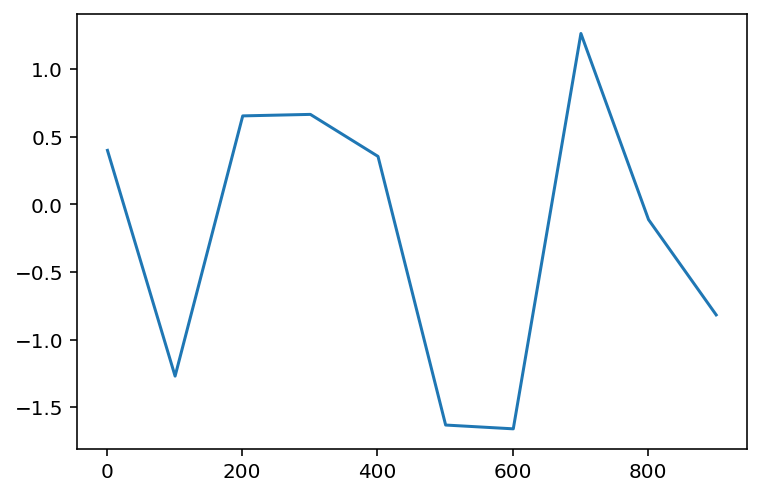

In [5]:
# If you want to get access to a specific variable just index it!
import matplotlib.pyplot as plt
plt.plot(meta_log.b_1_eval_0.time.step_counter.mean,
         meta_log.b_1_eval_0.stats.noise.mean)
plt.fill_between(meta_log.b_1_eval_0.time.step_counter.mean,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 - 2 * meta_log.b_1_eval_0.stats.noise.std,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 + 2 * meta_log.b_1_eval_0.stats.noise.std,
                 alpha=0.25)

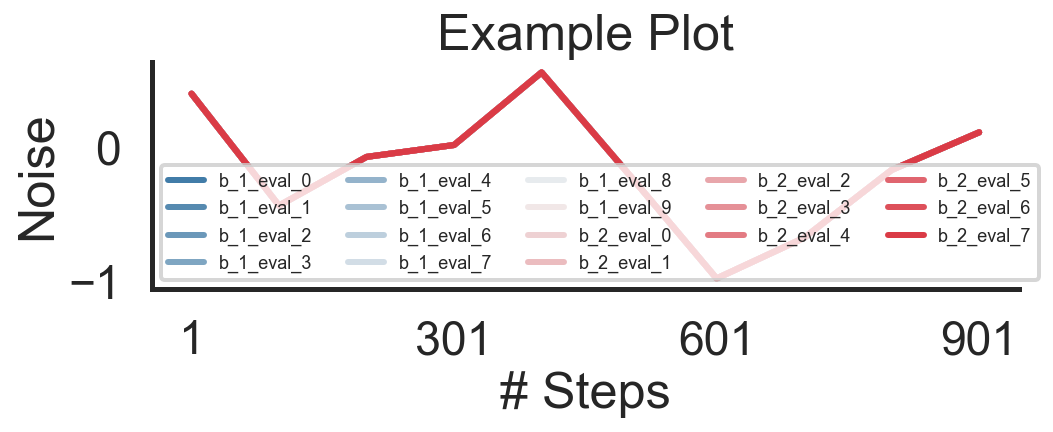

In [6]:
from mle_toolbox.visualize import visualize_1D_lcurves

fig, ax = visualize_1D_lcurves(meta_log,
                               iter_to_plot="step_counter",
                               target_to_plot="noise",
                               smooth_window=3,
                               plot_title= "Example Plot",
                               xy_labels = [r"# Steps",
                                            r"Noise"],
                               base_label=r"{}",
                               curve_labels=[],
                               every_nth_tick= 3,
                               plot_std_bar= True)
ax.legend(ncol=5, fontsize=9)

### Plot 2D Heatmap of tracked variable

In [7]:
meta_log.b_1_eval_2.stats.integral

DotMap(mean=masked_array(data=[10.007640838623047, 9.095192909240723,
                   8.314128875732422, 7.453947067260742, 6.53334379196167,
                   5.921163558959961, 5.137056827545166,
                   4.582229137420654, 4.026062488555908,
                   3.5961663722991943],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20), std=masked_array(data=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20))

In [8]:
meta_log.b_1_eval_1.stats.integral

DotMap(mean=masked_array(data=[5.51214075088501, 5.027699947357178, 4.63389253616333,
                   4.124098777770996, 3.5205230712890625,
                   3.1951870918273926, 2.6706149578094482,
                   2.350611686706543, 2.0069124698638916,
                   1.76925528049469],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20), std=masked_array(data=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20))

In [9]:
hyper_log#.log_paths.iloc[0]

,noise_mean,r_var,x_0,time_elapsed,run_id,integral,noise,log_paths,experiment_dir,config_fname,model_ckpt,seeds,model_type,fig_storage_paths,log_fname
0,0.000,0,1.0,21.607633,b_1_eval_0,-0.057656,-0.817493,experiments/ode/21-04-24_b_1_eval_0/logs/21-04...,experiments/ode/21-04-24_b_1_eval_0/,experiments/ode/21-04-24_b_1_eval_0/21-04-24_b...,experiments/ode/21-04-24_b_1_eval_0/models/fin...,[0],no-model-type-provided,experiments/ode/21-04-24_b_1_eval_0/figures/fi...,experiments/ode/21-04-24_b_1_eval_0/logs/b_1_e...
1,0.000,0,5.5,21.607633,b_1_eval_1,1.769255,-0.817493,experiments/ode/21-04-24_b_1_eval_1/logs/21-04...,experiments/ode/21-04-24_b_1_eval_1/,experiments/ode/21-04-24_b_1_eval_1/21-04-24_b...,experiments/ode/21-04-24_b_1_eval_1/models/fin...,[0],no-model-type-provided,experiments/ode/21-04-24_b_1_eval_1/figures/fi...,experiments/ode/21-04-24_b_1_eval_1/logs/b_1_e...
2,0.000,0,10.0,21.607633,b_1_eval_2,3.596166,-0.817493,experiments/ode/21-04-24_b_1_eval_2/logs/21-04...,experiments/ode/21-04-24_b_1_eval_2/,experiments/ode/21-04-24_b_1_eval_2/21-04-24_b...,experiments/ode/21-04-24_b_1_eval_2/models/fin...,[0],no-model-type-provided,experiments/ode/21-04-24_b_1_eval_2/figures/fi...,experiments/ode/21-04-24_b_1_eval_2/logs/b_1_e...
3,0.000,1,1.0,21.607633,b_1_eval_3,-0.057656,-0.817493,experiments/ode/21-04-24_b_1_eval_3/logs/21-04...,experiments/ode/21-04-24_b_1_eval_3/,experiments/ode/21-04-24_b_1_eval_3/21-04-24_b...,experiments/ode/21-04-24_b_1_eval_3/models/fin...,[0],no-model-type-provided,experiments/ode/21-04-24_b_1_eval_3/figures/fi...,experiments/ode/21-04-24_b_1_eval_3/logs/b_1_e...
4,0.000,1,5.5,21.607633,b_1_eval_4,1.769255,-0.817493,experiments/ode/21-04-24_b_1_eval_4/logs/21-04...,experiments/ode/21-04-24_b_1_eval_4/,experiments/ode/21-04-24_b_1_eval_4/21-04-24_b...,experiments/ode/21-04-24_b_1_eval_4/models/fin...,[0],no-model-type-provided,experiments/ode/21-04-24_b_1_eval_4/figures/fi...,experiments/ode/21-04-24_b_1_eval_4/logs/b_1_e...
5,0.000,1,10.0,21.607633,b_1_eval_5,3.596166,-0.817493,experiments/ode/21-04-24_b_1_eval_5/logs/21-04...,experiments/ode/21-04-24_b_1_eval_5/,experiments/ode/21-04-24_b_1_eval_5/21-04-24_b...,experiments/ode/21-04-24_b_1_eval_5/models/fin...,[0],no-model-type-provided,experiments/ode/21-04-24_b_1_eval_5/figures/fi...,experiments/ode/21-04-24_b_1_eval_5/logs/b_1_e...
6,0.005,0,1.0,21.607633,b_1_eval_6,0.239354,-0.817493,experiments/ode/21-04-24_b_1_eval_6/logs/21-04...,experiments/ode/21-04-24_b_1_eval_6/,experiments/ode/21-04-24_b_1_eval_6/21-04-24_b...,experiments/ode/21-04-24_b_1_eval_6/models/fin...,[0],no-model-type-provided,experiments/ode/21-04-24_b_1_eval_6/figures/fi...,experiments/ode/21-04-24_b_1_eval_6/logs/b_1_e...
7,0.005,0,5.5,21.607633,b_1_eval_7,2.066265,-0.817493,experiments/ode/21-04-24_b_1_eval_7/logs/21-04...,experiments/ode/21-04-24_b_1_eval_7/,experiments/ode/21-04-24_b_1_eval_7/21-04-24_b...,experiments/ode/21-04-24_b_1_eval_7/models/fin...,[0],no-model-type-provided,experiments/ode/21-04-24_b_1_eval_7/figures/fi...,experiments/ode/21-04-24_b_1_eval_7/logs/b_1_e...
8,0.005,0,10.0,21.607633,b_1_eval_8,3.893176,-0.817493,experiments/ode/21-04-24_b_1_eval_8/logs/21-04...,experiments/ode/21-04-24_b_1_eval_8/,experiments/ode/21-04-24_b_1_eval_8/21-04-24_b...,experiments/ode/21-04-24_b_1_eval_8/models/fin...,[0],no-model-type-provided,experiments/ode/21-04-24_b_1_eval_8/figures/fi...,experiments/ode/21-04-24_b_1_eval_8/logs/b_1_e...
9,0.005,1,1.0,21.607633,b_1_eval_9,0.239354,-0.817493,experiments/ode/21-04-24_b_1_eval_9/logs/21-04...,experiments/ode/21-04-24_b_1_eval_9/,experiments/ode/21-04-24_b_1_eval_9/21-04-24_b...,experiments/ode/21-04-24_b_1_eval_9/models/fin...,[0],no-model-type-provided,experiments/ode/21-04-24_b_1_eval_9/figures/fi...,experiments/ode/21-04-24_b_1_eval_9/logs/b_1_e...


In [ ]:
from mle_toolbox.visualize import visualize_2D_grid
fixed_params = {"r_var": 0}
params_to_plot = ["noise_mean", "x_0"]
target_to_plot = "integral"
visualize_2D_grid(hyper_log, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Final State Value - PDE Integration',
                  xy_labels=[r'Noise Mean', r'Init $x_0$'],
                  variable_name='Final Integral',
                  every_nth_tick=1, round_ticks=3,
                  text_in_cell=False, max_heat=None)

# VAE Training Example
### Reload trained network for stored checkpoint

In [ ]:
# Load log and get overview of different logged runs
meta_log, hyper_log = load_result_logs("../examples/experiments/vae/")
print(meta_log.b_1_eval_0.meta.top_k_performance)
print(meta_log.b_1_eval_0.meta.top_k_ckpt_list)

In [ ]:
from mle_toolbox.utils import load_model_ckpt

jax_params = load_model_ckpt(
                ckpt_path="../examples/" + meta_log.b_1_eval_0.meta.top_k_ckpt_list[0][0],
                model_type="jax", model=None)

# For torch model you will have to also supply the model class!

### Subselect the Meta Log and the Hyper Log

In [ ]:
from mle_toolbox.utils import subselect_hyper_log, subselect_meta_log

In [ ]:
# Get experiment run with param closest to selected
sub_hyper = subselect_hyper_log(hyper_log,
                                param_name="l_rates",
                                param_value=0.001)
sub_hyper

In [ ]:
# Get the detailed experiment logs for previously selected runs
sub_log = subselect_meta_log(meta_log, run_ids=sub_hyper.run_id.tolist())
sub_log.keys()